In [1]:
# Environment Setup
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
sym.init_printing(use_latex='mathjax')
from IPython.display import display, Markdown, Math

# First-Order Plus Dead Time System

Some systems behave like a first order system after some initial delay. We can model those as a first-order-plus-dead-time system.

⎛ t    ⎞  -t         
⎝ℯ  - ℯ⎠⋅ℯ  ⋅θ(t - 1)

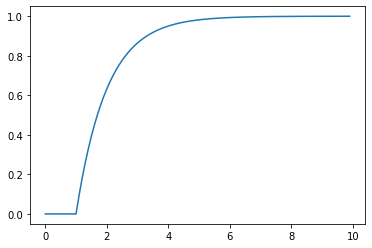

In [4]:
K, T = sym.symbols('K, T', real=True)
s = sym.symbols('s')
td, t = sym.symbols('t_d, t', real=True, positive = True)

# Laplace Transform of Unit Step
H = 1/s 

# Laplace Transform of a FOPDT System.
F = K/(T*s + 1) * sym.exp(-s*td)  

# Plot the Unit Step Response.
# Sympy can't find Heavyside function without some help when we Lambdify a function.
modules = [{'Heaviside': lambda x: np.heaviside(x, 1)}, 'numpy']
f_unit_step_response = sym.inverse_laplace_transform(F*H, s, t).subs({T: 1, K: 1, td: 1})
display(f_unit_step_response)
lambda_f = sym.lambdify(t, f_unit_step_response, modules=modules)


time_series = np.arange(0, 10, 0.1)
f_series = np.array([lambda_f(t) for t in time_series])


plt.plot(time_series, f_series)
plt.show()